In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Domain Analysis

We are predicting the selling price of different cars based on several factors:

Features:

-Purchased Year

-Present Price (Crucial feature)

-Driven Kilometers

-Fuel Type

-Selling Type

-Transmission

-Owner

Total Features: 9 (including categorical and numerical features).

-Output Feature: Selling Price

Key Insight: Present Price plays a significant role in price prediction.

Time-Based Feature: The dataset includes Year, which can be used to derive car age (Current Year - Purchased Year).

The Task which is we gonna do is regression task

# Basic Check

all the values with in the dataset are non-null

encoding task- Car_Name , Fuel_Type	,Selling_type,  Transmission

scaling task-Selling_Price,	Present_Price,Driven_kms

outliers handling - selling_price , present_price

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [23]:
df.describe(include='O')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


# EDA - Exploratory Data Analysis

Insights from Histogram:

1]Year of Vehicles:

Most vehicles were manufactured between 2010 and 2018.

2]Ownership:

More than 90% of vehicles had 0 previous owners (i.e., they were never resold).

3]Fuel Type Distribution:

Petrol vehicles dominate the dataset.

4]Diesel & CNG are fewer, with only 2 CNG vehicles recorded.

5]Seller Type Distribution:

Dealers hold 196 vehicles, while individuals hold 106.

6]Transmission Type:

More than 70% of vehicles have manual transmission

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

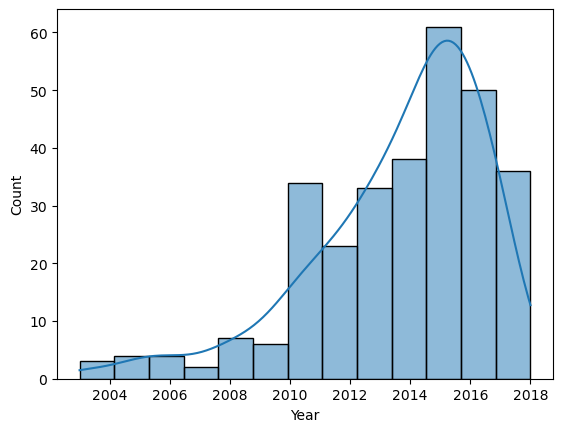

In [20]:
sns.histplot(x=df['Year'] , kde=True)
plt.show()

<Axes: xlabel='Owner', ylabel='Count'>

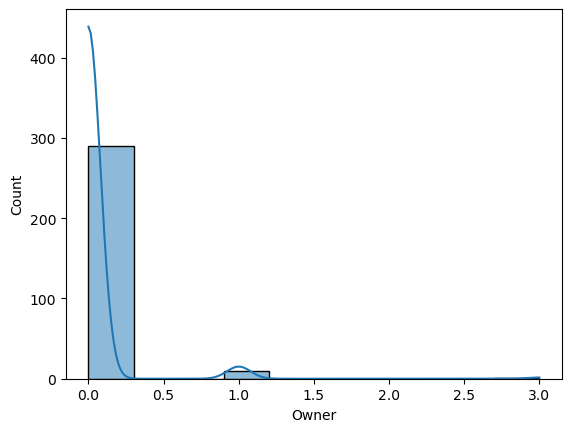

In [40]:
sns.histplot(x=df['Owner'] , kde=True)

<Axes: xlabel='Fuel_Type', ylabel='Count'>

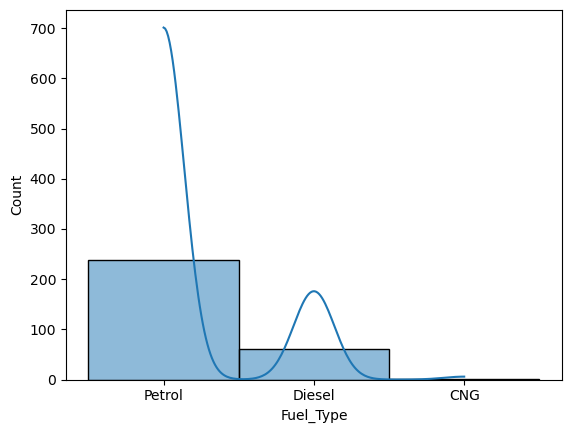

In [24]:
sns.histplot(x=df['Fuel_Type'] , kde=True)

<Axes: xlabel='Selling_type', ylabel='Count'>

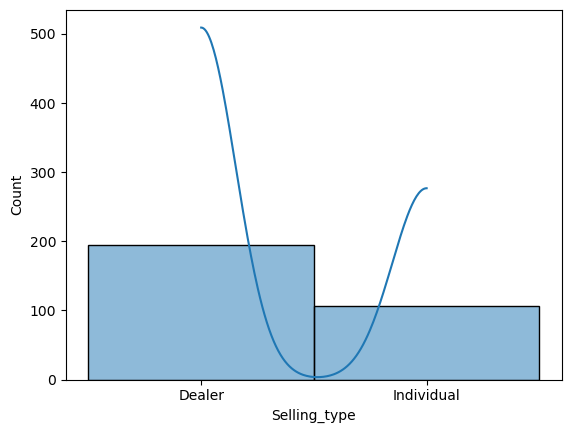

In [29]:
sns.histplot(x=df['Selling_type'] , kde=True)

<Axes: xlabel='Transmission', ylabel='Count'>

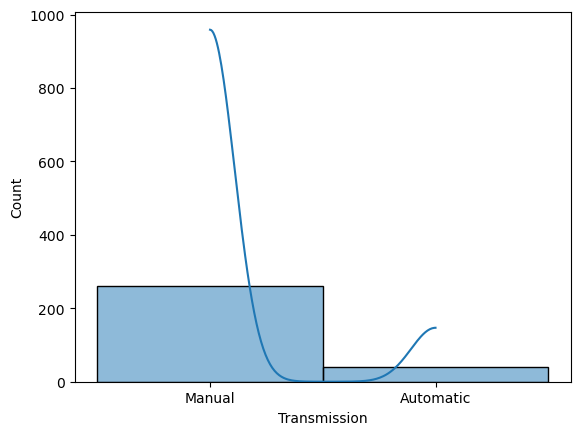

In [28]:
sns.histplot(x=df['Transmission'] , kde=True)

# Bi-Variate

1]Since , most of the vehicles were manufactured b/w 2010-2018 and more than 90% vehicles had 0 owners or never resold , so there's no co-relation between year and selling price

2]there is good variance in driven_kms but it is only 0.029 corelated with output feature  , most of the cars have been driven b/w 0 to 100000 to kms.

3]selling and present price has strong positive relation-0.87

4]owners and selling_price is not co-related - 0.088

Bi-Variate Analysis

1]Year vs. Selling Price

Most vehicles were manufactured between 2010-2018,  accrording to data still they are highely driven so.

There is weak connection and correlation between Year and Selling_Price.(0.23) 

2]Driven_kms vs. Selling Price

Despite good variance in Driven_kms, its correlation with Selling_Price is very weak (0.029).

Most cars have been driven between 0 to 100,000 km, meaning mileage alone does not strongly impact price.

3]Present Price vs. Selling Price

Strong positive correlation (0.87), indicating that higher new car prices generally lead to higher resale value.

4]Owners vs. Selling Price

Weak correlation (-0.088), meaning the number of previous owners does not significantly impact the selling price.

so , hence we can exclude two features (driven_kms , owner )while training .
we will include year because we have various models so 

<Axes: xlabel='Selling_Price', ylabel='Year'>

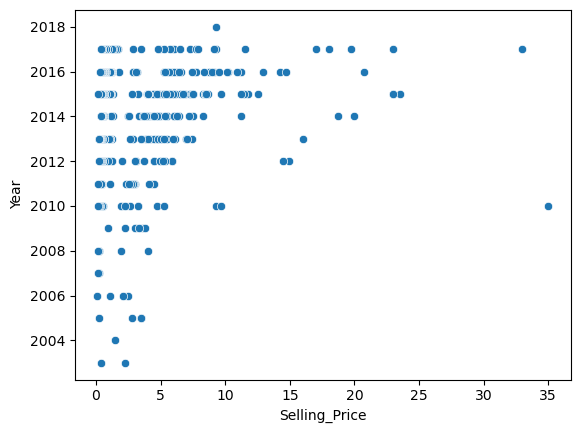

In [6]:
# there is no relation b/w purchased year and selling_price

sns.scatterplot(y=df['Year'] , x=df['Selling_Price'])

<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

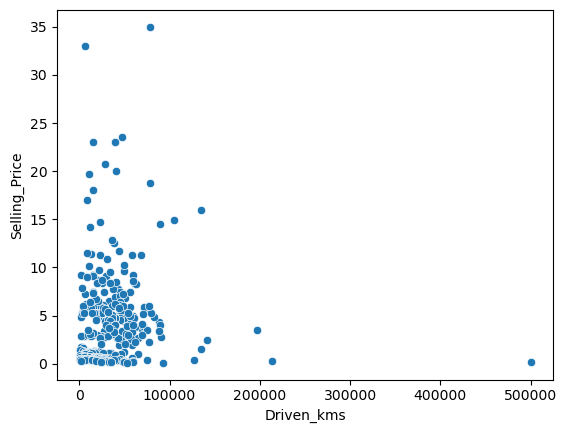

In [7]:
sns.scatterplot(x=df['Driven_kms'] , y=df['Selling_Price'])

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

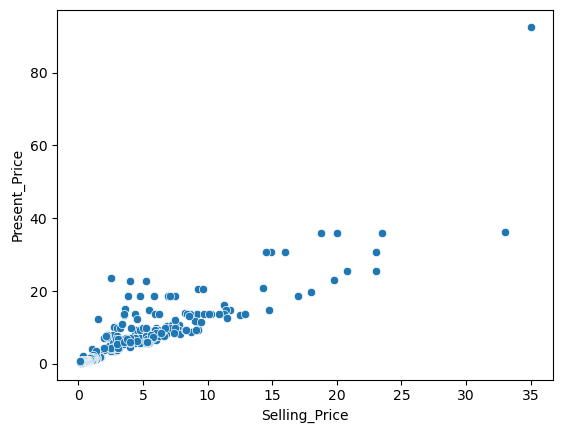

In [10]:
sns.scatterplot(x=df['Selling_Price'] , y=df['Present_Price'])

In [11]:
df.corr(numeric_only=1)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


<Axes: xlabel='Selling_Price', ylabel='Owner'>

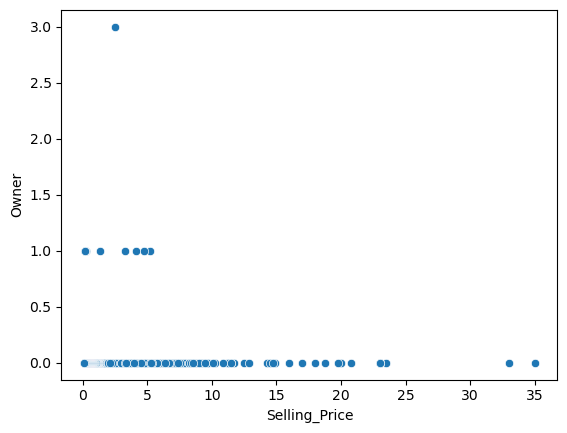

In [55]:
sns.scatterplot(x=df['Selling_Price'] , y=df['Owner'])

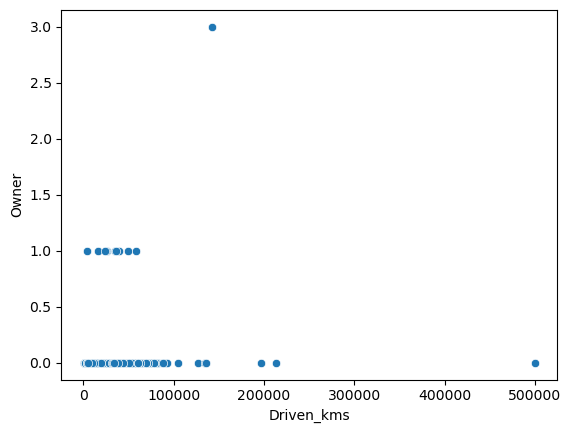

In [45]:
sns.scatterplot(x=df['Driven_kms'] , y=df['Owner'])
plt.show()

In [49]:
df.corr(numeric_only=True) 

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000
